# Flights vs. Weather Project

## Setting up environment

### Copy .env and sql_functions from previous notebooks

In [5]:
! cp /Users/danielschuster/neuefische/Git/forked-da-external-data-sourcing/.env .
! cp /Users/danielschuster/neuefische/Git/forked-da-external-data-sourcing/sql_functions.py .

## TASK 1: Historical Weather Event --> Hurricane Katrina, August 23, 2005

### Connect to Meteostat API

In [5]:
from dotenv import load_dotenv
load_dotenv();

In [93]:
import requests

url = "https://meteostat.p.rapidapi.com/point/hourly"

querystring = {"lat":"29.951065","lon":"-90.071533","start":"2005-08-01","end":"2005-08-31","alt":"2"}

headers = {
	"X-RapidAPI-Key": "c69d1849f8msh3a61f55e6a3489ep191c05jsn0279f8ea1891",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.headers)

{'Date': 'Fri, 02 Dec 2022 15:55:33 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'public, must-revalidate, max-age=2592000', 'Content-Encoding': 'gzip', 'Last-Modified': 'Fri, 02 Dec 2022 15:18:27 GMT', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Server-Timing': 'cf-q-config;dur=4.9999998736894e-06', 'CF-Cache-Status': 'HIT', 'X-Meteostat-Server': 'jasper', 'CF-RAY': '77353f5ccef44168-HAM', 'Vary': 'Accept-Encoding', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=lpoHiWvDMgXUsCMHPXVTQD0q2XU7u6eaFMnZKdK0Ph5nHEVbkY%2BQ7vYb4mw9QGTc1AFYN47LwbTbvdoxV%2BK%2FO1G3JEQADQUB9ZYt%2FVvSItFuFXx7ZfjO7inDPk7eONsHsrgWn%2BW1OQ%3D%3D"}],"group":"cf-nel","max_age":604800}', 'alt-svc': 'h3=":443"; ma=86400, h3-29=":443"; ma=86400', 'X-RateLimit-Requests-Limit': '500', 'X-RateLimit-Requests-Remaining': '478', 'X-RateLimit-Requests-Reset': '2668592', 'Server': 'RapidAPI-

In [94]:
# Import json package
import json

# Create json object: json_object
json_object = json.loads(response.content)

# Print json_object
json.dumps(json_object, indent = 3)

json_object

{'meta': {'generated': '2022-12-02 15:18:27',
  'stations': ['72231', 'KNEW0', 'KNBG0', 'KASD0']},
 'data': [{'time': '2005-08-01 00:00:00',
   'temp': 28.9,
   'dwpt': 22.9,
   'rhum': 70.0,
   'prcp': 0.0,
   'snow': None,
   'wdir': 170.0,
   'wspd': 9.4,
   'wpgt': None,
   'pres': 1015.1,
   'tsun': None,
   'coco': None},
  {'time': '2005-08-01 01:00:00',
   'temp': 28.3,
   'dwpt': 21.6,
   'rhum': 67.0,
   'prcp': 0.0,
   'snow': None,
   'wdir': 140.0,
   'wspd': 5.4,
   'wpgt': None,
   'pres': 1015.8,
   'tsun': None,
   'coco': None},
  {'time': '2005-08-01 02:00:00',
   'temp': 28.3,
   'dwpt': 20.6,
   'rhum': 63.0,
   'prcp': 0.0,
   'snow': None,
   'wdir': None,
   'wspd': 0.0,
   'wpgt': None,
   'pres': 1016.1,
   'tsun': None,
   'coco': None},
  {'time': '2005-08-01 03:00:00',
   'temp': 26.7,
   'dwpt': 23.4,
   'rhum': 82.0,
   'prcp': 0.0,
   'snow': None,
   'wdir': 280.0,
   'wspd': 5.4,
   'wpgt': None,
   'pres': 1016.1,
   'tsun': None,
   'coco': None},
  

In [95]:
type(response)
weather_katrina = response.json()
type(weather_katrina)

dict

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2005-08-01 00:00:00,28.9,22.9,70.0,0.0,None,170.0,9.4,None,1015.1,None,None
1,2005-08-01 01:00:00,28.3,21.6,67.0,0.0,None,140.0,5.4,None,1015.8,None,None
2,2005-08-01 02:00:00,28.3,20.6,63.0,0.0,None,NaN,0.0,None,1016.1,None,None
3,2005-08-01 03:00:00,26.7,23.4,82.0,0.0,None,280.0,5.4,None,1016.1,None,None
4,2005-08-01 04:00:00,25.6,23.3,87.0,0.0,None,100.0,0.0,None,1016.2,None,None


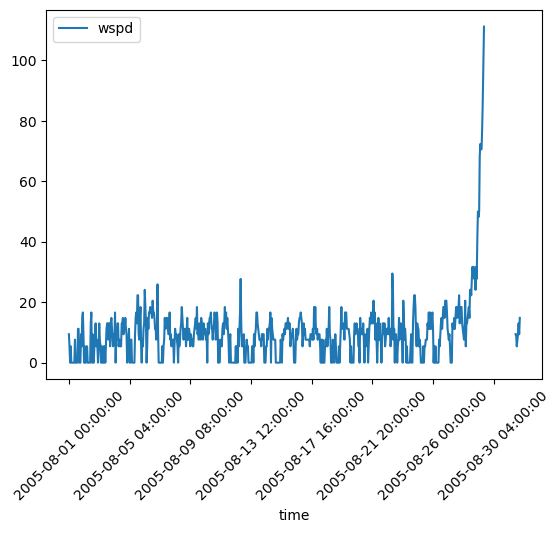

In [98]:
import pandas as pd

weather_katrina_data = weather_katrina['data']

weather_katrina_meta = weather_katrina['meta']

weather_katrina_data_norm = pd.json_normalize(weather_katrina_data, sep="_")

display(weather_katrina_data_norm.head())

weather_katrina_data_norm.plot(x='time',y='wspd', rot=45);

#weather_katrina_data_norm['city'] = ['New Orleans' for i in len(weather_katrina_data_norm)]

#pd.DataFrame(weather_katrina_data_norm)

In [80]:
weather_katrina_df = pd.json_normalize(weather_katrina, 
                                       sep="_", 
                                       record_path="data", 
                                    #    meta=[["meta", "generated"], 
                                    #          ["meta", "stations"]],
                                       record_prefix="data_",
                                       errors='ignore')
weather_katrina_df.head()

,data_time,data_temp,data_dwpt,data_rhum,data_prcp,data_snow,data_wdir,data_wspd,data_wpgt,data_pres,data_tsun,data_coco
0,2005-08-01 00:00:00,28.9,22.9,70.0,0.0,None,170.0,9.4,None,1015.1,None,None
1,2005-08-01 01:00:00,28.3,21.6,67.0,0.0,None,140.0,5.4,None,1015.8,None,None
2,2005-08-01 02:00:00,28.3,20.6,63.0,0.0,None,NaN,0.0,None,1016.1,None,None
3,2005-08-01 03:00:00,26.7,23.4,82.0,0.0,None,280.0,5.4,None,1016.1,None,None
4,2005-08-01 04:00:00,25.6,23.3,87.0,0.0,None,100.0,0.0,None,1016.2,None,None


### OTHER AIRPORTS FOR DATAFRAMES

* New Orleans, Ln, MSY --> done
* Baton Rouge, La, BTR --> Daniel
* Biloxi, Miss, GPT --> Daniel
* Mobile, Ala, MOB --> Juls
* Pensacola, Fla, PNS --> Juls
* Eglin Air Force Base, Fla, VPS --> Juls